(45, 8)
Loaded 45 heroes.


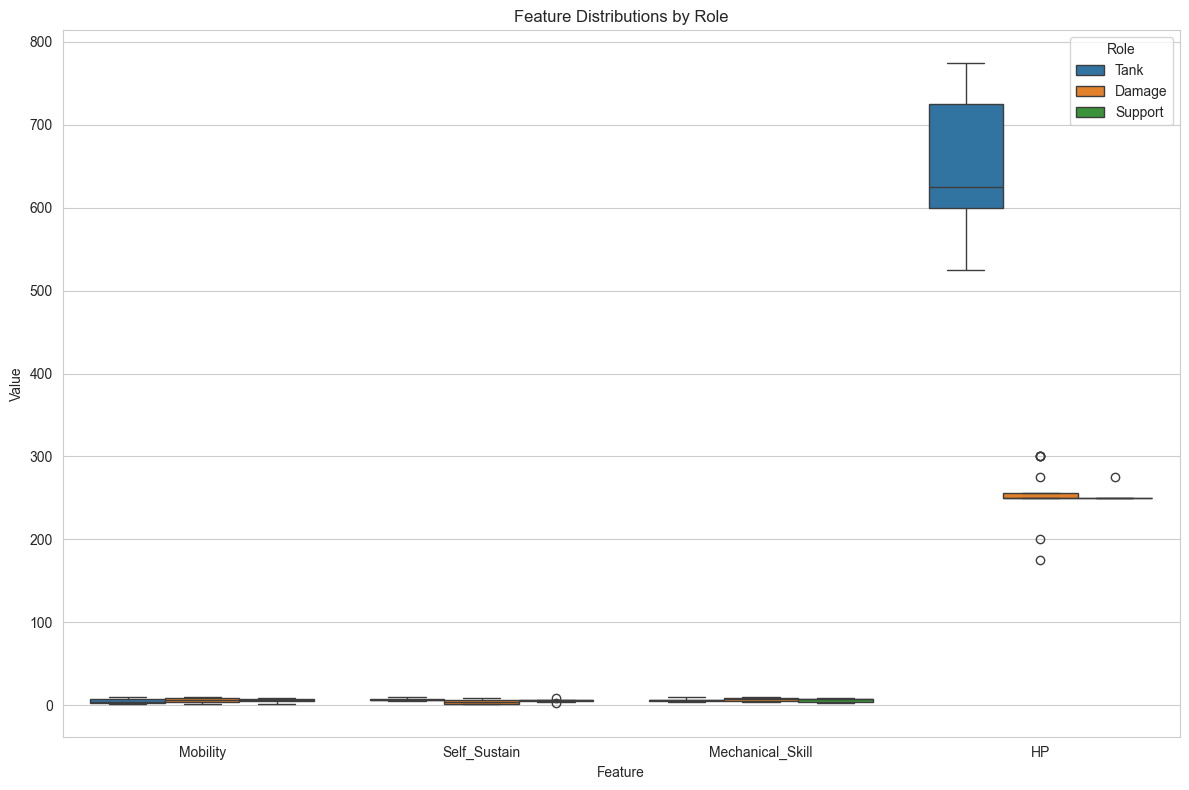

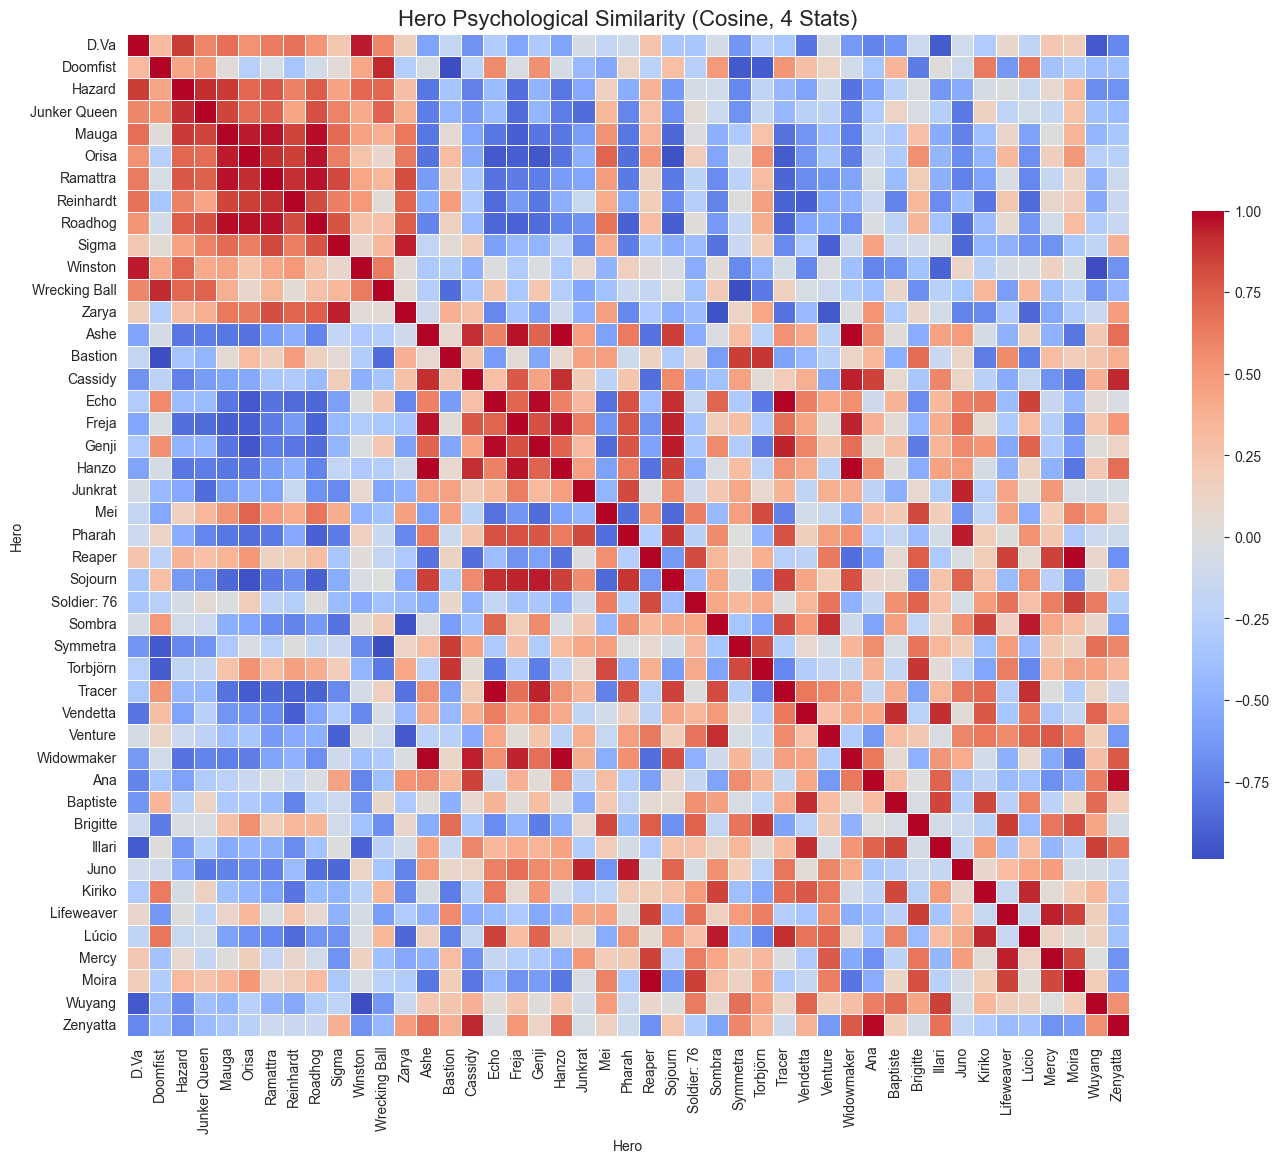


Top 5 matches for Hazard:
Hero
Junker Queen    0.908298
Mauga           0.869988
D.Va            0.864457
Ramattra        0.770520
Roadhog         0.757801
Name: Hazard, dtype: float64

Top 5 matches for Mercy:
Hero
Lifeweaver    0.939653
Reaper        0.852371
Moira         0.833203
Venture       0.762889
Brigitte      0.652035
Name: Mercy, dtype: float64

Top 5 matches for Genji:
Hero
Echo       0.979250
Sojourn    0.948640
Tracer     0.933548
Freja      0.804519
Pharah     0.778220
Name: Genji, dtype: float64

Top 5 matches for Ana:
Hero
Zenyatta      0.981729
Cassidy       0.848566
Illari        0.735784
Widowmaker    0.647921
Wuyang        0.617555
Name: Ana, dtype: float64
Generated file: overwatch_full_similarity_top5.csv
Explained variance by PC1, PC2: [0.47571788 0.23649675]
Total variance (PC1+PC2): 0.712


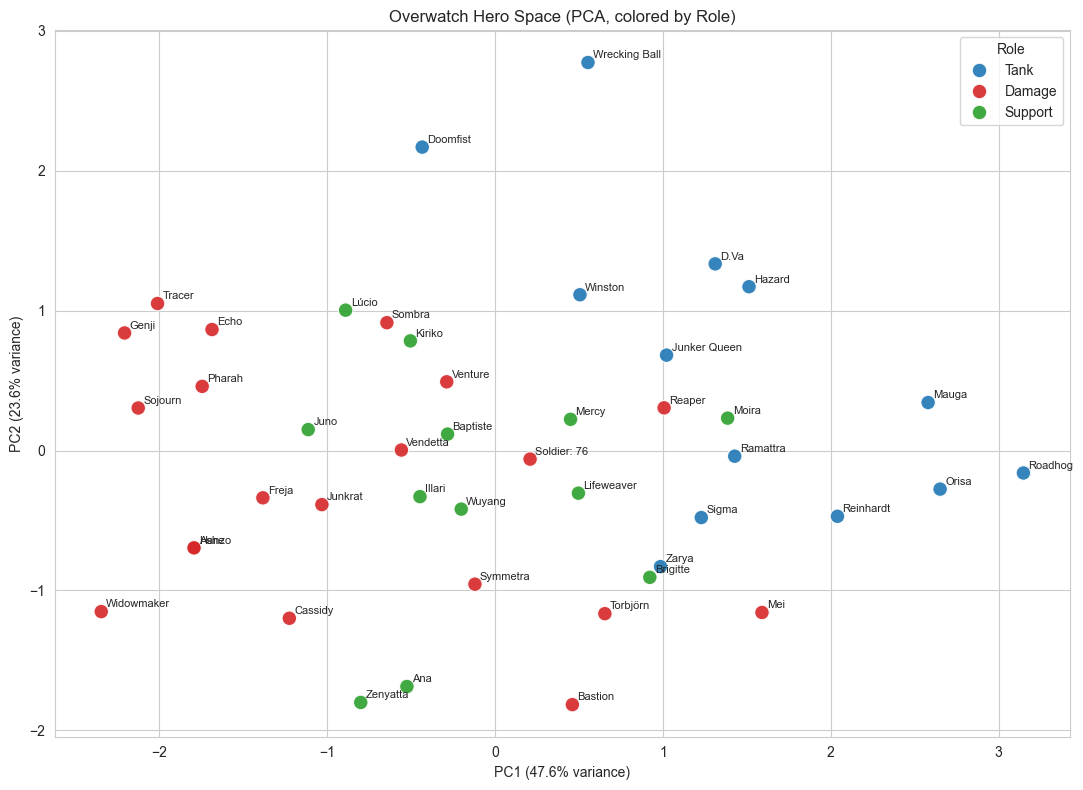

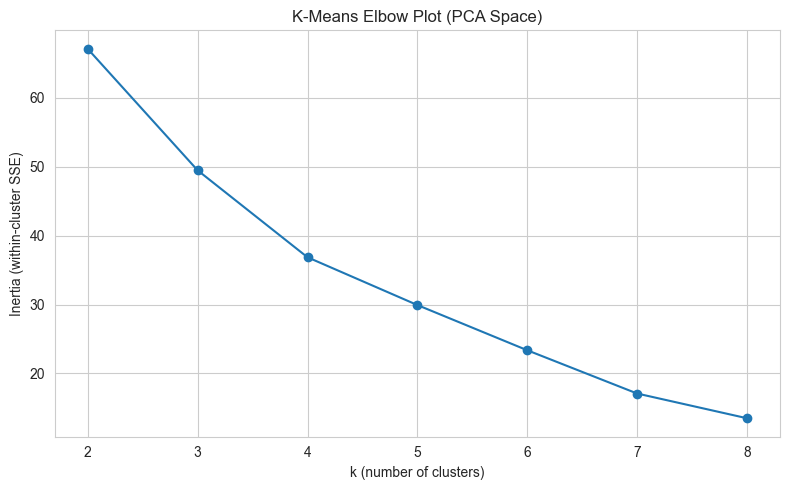

Silhouette score for k=4: 0.326


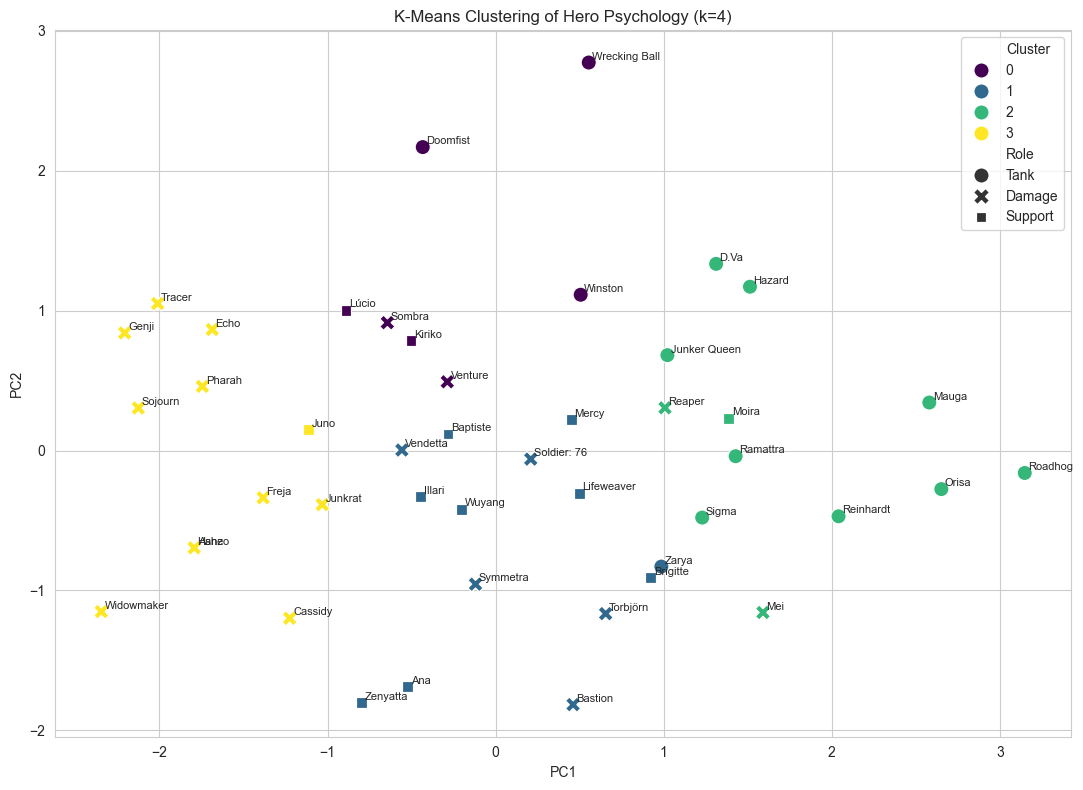


--- Cluster 0 ---
['Doomfist' 'Winston' 'Wrecking Ball' 'Sombra' 'Venture' 'Kiriko' 'Lúcio']

--- Cluster 1 ---
['Zarya' 'Bastion' 'Soldier: 76' 'Symmetra' 'Torbjörn' 'Vendetta' 'Ana'
 'Baptiste' 'Brigitte' 'Illari' 'Lifeweaver' 'Mercy' 'Wuyang' 'Zenyatta']

--- Cluster 2 ---
['D.Va' 'Hazard' 'Junker Queen' 'Mauga' 'Orisa' 'Ramattra' 'Reinhardt'
 'Roadhog' 'Sigma' 'Mei' 'Reaper' 'Moira']

--- Cluster 3 ---
['Ashe' 'Cassidy' 'Echo' 'Freja' 'Genji' 'Hanzo' 'Junkrat' 'Pharah'
 'Sojourn' 'Tracer' 'Widowmaker' 'Juno']
Role     Damage  Support  Tank
Cluster                       
0             2        2     3
1             5        8     1
2             2        1     9
3            11        1     0


<Figure size 800x500 with 0 Axes>

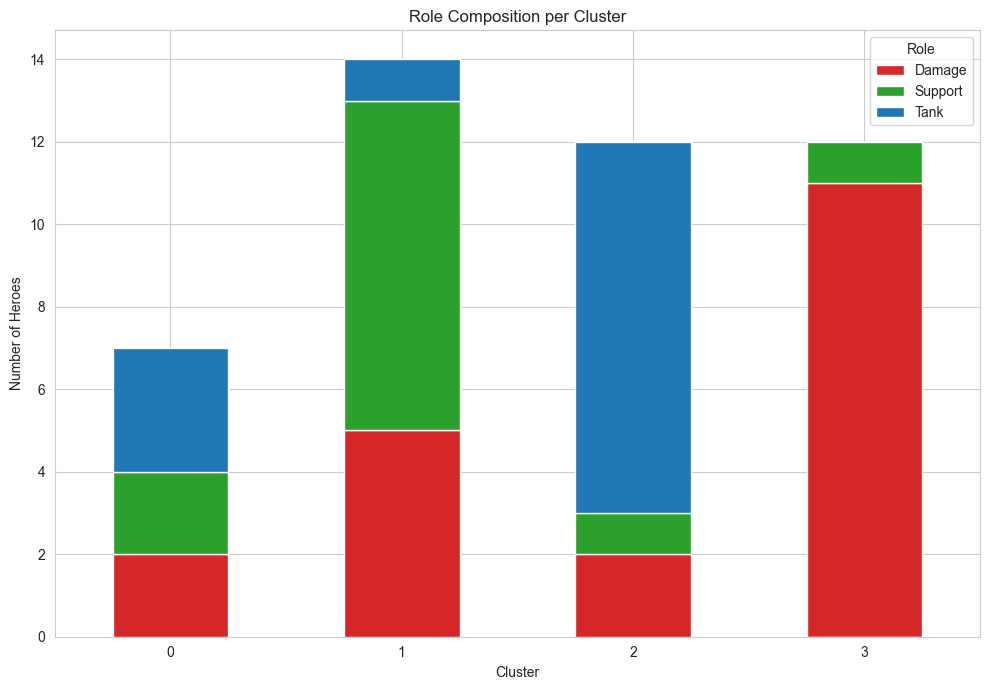

         Mobility  Self_Sustain  Mechanical_Skill      HP
Cluster                                                  
0            8.86          6.43              7.86  417.86
1            4.21          5.79              6.29  280.36
2            4.58          8.00              5.17  564.58
3            6.92          2.58              8.33  241.67


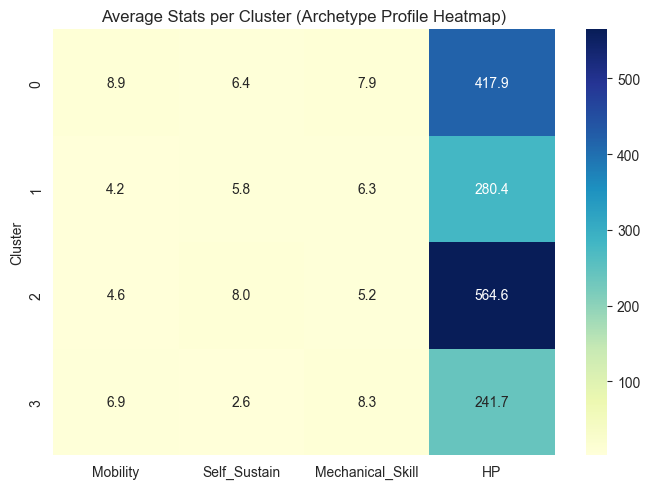

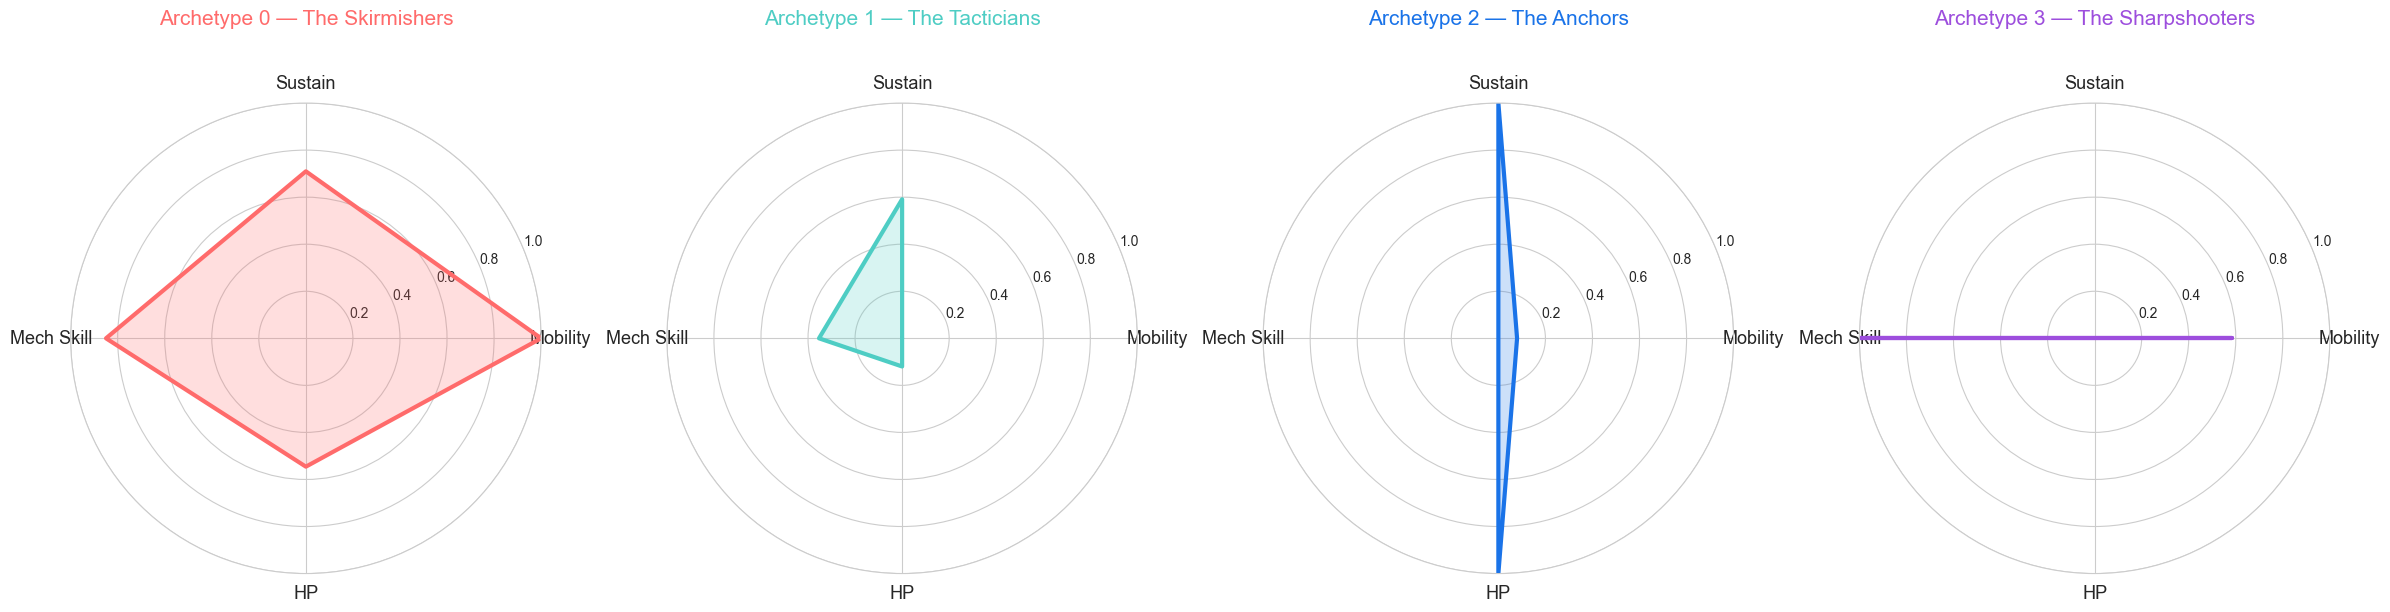

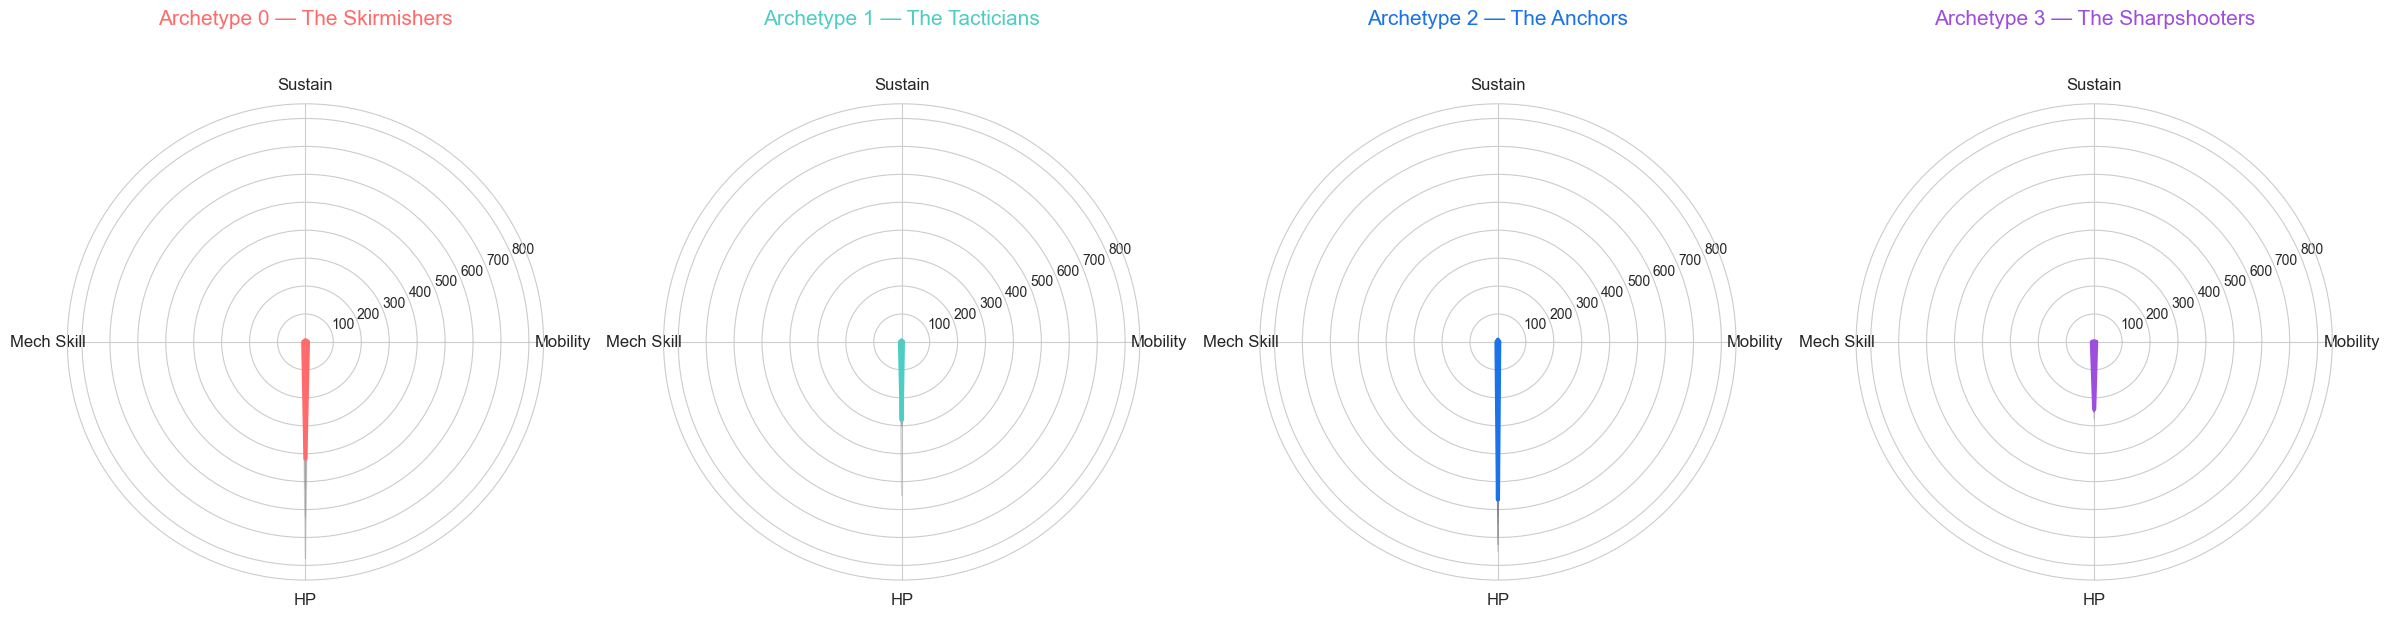

In [9]:
# %% [markdown]
# # Overwatch Hero Psychology: Full Archetype Analysis
#
# **Modules Applied**
# - Similarity (Cosine Similarity)
# - Dimensionality Reduction (PCA)
# - Clustering (K-Means)
# - Visualization (Heatmaps, Scatterplots, Radar Charts)
#
# We extend *"We Are Who We Lock"* by:
# 1. Expanding to the full 45-hero roster (Season 20).
# 2. Using PCA to build a 2D "Hero Space".
# 3. Using K-Means to discover 4 psychological archetypes.
# 4. Visualizing archetypes with multiple plots (including radar charts).


# %% [code]
# 0. Imports & Style
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi

from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

plt.rcParams["figure.figsize"] = (10, 7)
sns.set_style("whitegrid")

role_colors = {"Tank": "#1f77b4", "Damage": "#d62728", "Support": "#2ca02c"}


# %% [markdown]
# ## 1. Build / Load Hero Dataset
# We define the full hero roster and psychological stats, then create:
# - `Mobility`
# - `Self_Sustain`
# - `Mechanical_Skill`
# - `HP`
# - One-hot role indicators (Damage, Support, Tank)


# %% [code]
# Define columns
columns = [
    "Hero", "Mobility", "Self_Sustain", "Mechanical_Skill",
    "HP", "Damage", "Support", "Tank"
]

# Full roster (45 heroes, Season 20)
heroes_data = [
    # --- TANK HEROES ---
    {"Hero": "D.Va", "Mobility": 8, "Self_Sustain": 6, "Mechanical_Skill": 5, "HP": 725, "Role": "Tank"},
    {"Hero": "Doomfist", "Mobility": 10, "Self_Sustain": 7, "Mechanical_Skill": 10, "HP": 525, "Role": "Tank"},
    {"Hero": "Hazard", "Mobility": 7, "Self_Sustain": 8, "Mechanical_Skill": 6, "HP": 650, "Role": "Tank"},
    {"Hero": "Junker Queen", "Mobility": 6, "Self_Sustain": 8, "Mechanical_Skill": 7, "HP": 525, "Role": "Tank"},
    {"Hero": "Mauga", "Mobility": 4, "Self_Sustain": 9, "Mechanical_Skill": 5, "HP": 725, "Role": "Tank"},
    {"Hero": "Orisa", "Mobility": 3, "Self_Sustain": 9, "Mechanical_Skill": 4, "HP": 625, "Role": "Tank"},
    {"Hero": "Ramattra", "Mobility": 4, "Self_Sustain": 7, "Mechanical_Skill": 6, "HP": 600, "Role": "Tank"},
    {"Hero": "Reinhardt", "Mobility": 3, "Self_Sustain": 6, "Mechanical_Skill": 4, "HP": 700, "Role": "Tank"},
    {"Hero": "Roadhog", "Mobility": 2, "Self_Sustain": 10, "Mechanical_Skill": 5, "HP": 750, "Role": "Tank"},
    {"Hero": "Sigma", "Mobility": 2, "Self_Sustain": 7, "Mechanical_Skill": 8, "HP": 625, "Role": "Tank"},
    {"Hero": "Winston", "Mobility": 8, "Self_Sustain": 5, "Mechanical_Skill": 6, "HP": 625, "Role": "Tank"},
    {"Hero": "Wrecking Ball", "Mobility": 10, "Self_Sustain": 8, "Mechanical_Skill": 10, "HP": 775, "Role": "Tank"},
    {"Hero": "Zarya", "Mobility": 2, "Self_Sustain": 6, "Mechanical_Skill": 7, "HP": 550, "Role": "Tank"},

    # --- DAMAGE HEROES ---
    {"Hero": "Ashe", "Mobility": 5, "Self_Sustain": 2, "Mechanical_Skill": 9, "HP": 250, "Role": "Damage"},
    {"Hero": "Bastion", "Mobility": 2, "Self_Sustain": 4, "Mechanical_Skill": 4, "HP": 300, "Role": "Damage"},
    {"Hero": "Cassidy", "Mobility": 3, "Self_Sustain": 3, "Mechanical_Skill": 9, "HP": 275, "Role": "Damage"},
    {"Hero": "Echo", "Mobility": 9, "Self_Sustain": 4, "Mechanical_Skill": 9, "HP": 250, "Role": "Damage"},
    {"Hero": "Freja", "Mobility": 6, "Self_Sustain": 3, "Mechanical_Skill": 8, "HP": 250, "Role": "Damage"},
    {"Hero": "Genji", "Mobility": 9, "Self_Sustain": 3, "Mechanical_Skill": 10, "HP": 250, "Role": "Damage"},
    {"Hero": "Hanzo", "Mobility": 5, "Self_Sustain": 2, "Mechanical_Skill": 9, "HP": 250, "Role": "Damage"},
    {"Hero": "Junkrat", "Mobility": 7, "Self_Sustain": 2, "Mechanical_Skill": 5, "HP": 250, "Role": "Damage"},
    {"Hero": "Mei", "Mobility": 2, "Self_Sustain": 9, "Mechanical_Skill": 5, "HP": 300, "Role": "Damage"},
    {"Hero": "Pharah", "Mobility": 9, "Self_Sustain": 2, "Mechanical_Skill": 7, "HP": 250, "Role": "Damage"},
    {"Hero": "Reaper", "Mobility": 7, "Self_Sustain": 8, "Mechanical_Skill": 4, "HP": 300, "Role": "Damage"},
    {"Hero": "Sojourn", "Mobility": 8, "Self_Sustain": 2, "Mechanical_Skill": 9, "HP": 250, "Role": "Damage"},
    {"Hero": "Soldier: 76", "Mobility": 6, "Self_Sustain": 7, "Mechanical_Skill": 6, "HP": 250, "Role": "Damage"},
    {"Hero": "Sombra", "Mobility": 9, "Self_Sustain": 6, "Mechanical_Skill": 7, "HP": 250, "Role": "Damage"},
    {"Hero": "Symmetra", "Mobility": 4, "Self_Sustain": 5, "Mechanical_Skill": 6, "HP": 250, "Role": "Damage"},
    {"Hero": "Torbjörn", "Mobility": 3, "Self_Sustain": 6, "Mechanical_Skill": 5, "HP": 300, "Role": "Damage"},
    {"Hero": "Tracer", "Mobility": 10, "Self_Sustain": 4, "Mechanical_Skill": 9, "HP": 175, "Role": "Damage"},
    {"Hero": "Vendetta", "Mobility": 6, "Self_Sustain": 6, "Mechanical_Skill": 8, "HP": 250, "Role": "Damage"},
    {"Hero": "Venture", "Mobility": 8, "Self_Sustain": 6, "Mechanical_Skill": 6, "HP": 250, "Role": "Damage"},
    {"Hero": "Widowmaker", "Mobility": 4, "Self_Sustain": 1, "Mechanical_Skill": 10, "HP": 200, "Role": "Damage"},

    # --- SUPPORT HEROES ---
    {"Hero": "Ana", "Mobility": 1, "Self_Sustain": 5, "Mechanical_Skill": 9, "HP": 250, "Role": "Support"},
    {"Hero": "Baptiste", "Mobility": 6, "Self_Sustain": 7, "Mechanical_Skill": 8, "HP": 250, "Role": "Support"},
    {"Hero": "Brigitte", "Mobility": 4, "Self_Sustain": 7, "Mechanical_Skill": 4, "HP": 250, "Role": "Support"},
    {"Hero": "Illari", "Mobility": 5, "Self_Sustain": 6, "Mechanical_Skill": 8, "HP": 250, "Role": "Support"},
    {"Hero": "Juno", "Mobility": 8, "Self_Sustain": 3, "Mechanical_Skill": 6, "HP": 250, "Role": "Support"},
    {"Hero": "Kiriko", "Mobility": 8, "Self_Sustain": 7, "Mechanical_Skill": 8, "HP": 250, "Role": "Support"},
    {"Hero": "Lifeweaver", "Mobility": 6, "Self_Sustain": 6, "Mechanical_Skill": 4, "HP": 275, "Role": "Support"},
    {"Hero": "Lúcio", "Mobility": 9, "Self_Sustain": 6, "Mechanical_Skill": 8, "HP": 250, "Role": "Support"},
    {"Hero": "Mercy", "Mobility": 8, "Self_Sustain": 6, "Mechanical_Skill": 3, "HP": 250, "Role": "Support"},
    {"Hero": "Moira", "Mobility": 7, "Self_Sustain": 9, "Mechanical_Skill": 3, "HP": 250, "Role": "Support"},
    {"Hero": "Wuyang", "Mobility": 5, "Self_Sustain": 6, "Mechanical_Skill": 7, "HP": 250, "Role": "Support"},
    {"Hero": "Zenyatta", "Mobility": 1, "Self_Sustain": 4, "Mechanical_Skill": 9, "HP": 250, "Role": "Support"},
]

df_full = pd.DataFrame(heroes_data)

df_full["Damage"] = df_full["Role"].apply(lambda x: 1 if x == "Damage" else 0)
df_full["Support"] = df_full["Role"].apply(lambda x: 1 if x == "Support" else 0)
df_full["Tank"]   = df_full["Role"].apply(lambda x: 1 if x == "Tank" else 0)

df_full = df_full[columns]

print(df_full.shape)
df_full.head()


# %% [markdown]
# ## 2. Preprocessing & Basic EDA
# - Build a `Role` label from the one-hots
# - Standardize the four continuous features
# - Quick distributions to sanity-check ranges


# %% [code]
df = df_full.copy()

def get_role(row):
    if row["Tank"] == 1: return "Tank"
    if row["Damage"] == 1: return "Damage"
    if row["Support"] == 1: return "Support"
    return "Unknown"

df["Role"] = df.apply(get_role, axis=1)

features = ["Mobility", "Self_Sustain", "Mechanical_Skill", "HP"]
X = df[features].values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

df_scaled = pd.DataFrame(X_scaled, columns=features)
df_scaled["Hero"] = df["Hero"]
df_scaled["Role"] = df["Role"]

print(f"Loaded {len(df)} heroes.")
df.head()


# %% [code]
# Quick feature distributions (boxplots) by role
plt.figure(figsize=(12, 8))
melted = df.melt(id_vars=["Hero", "Role"], value_vars=features,
                 var_name="Feature", value_name="Value")
sns.boxplot(data=melted, x="Feature", y="Value", hue="Role")
plt.title("Feature Distributions by Role")
plt.tight_layout()
plt.show()


# %% [markdown]
# ## 3. Similarity Analysis (Cosine)
# We compute a cosine similarity matrix over the scaled features to ask:
# > "Which heroes are psychologically similar to each other?"


# %% [code]
similarity_matrix = cosine_similarity(X_scaled)
sim_df = pd.DataFrame(similarity_matrix, index=df["Hero"], columns=df["Hero"])

plt.figure(figsize=(14, 12))
sns.heatmap(sim_df, cmap="coolwarm", center=0, square=True,
            linewidths=0.4, cbar_kws={"shrink": 0.6})
plt.title("Hero Psychological Similarity (Cosine, 4 Stats)", fontsize=16)
plt.tight_layout()
plt.show()


# %% [code]
# Example: Top 5 most similar heroes for a few sample picks
def print_top_similar(hero, top_n=5):
    if hero not in sim_df.index:
        print(f"{hero} not found in similarity matrix.")
        return
    sims = sim_df.loc[hero].sort_values(ascending=False).iloc[1:top_n+1]
    print(f"\nTop {top_n} matches for {hero}:")
    print(sims)

for hero in ["Hazard", "Mercy", "Genji", "Ana"]:
    print_top_similar(hero)

# ==========================================================
#  FULL TOP-5 SIMILARITY TABLE (export to CSV)
# ==========================================================

top_matches = []

for hero in sim_df.index:
    sims = sim_df.loc[hero].sort_values(ascending=False)
    sims = sims.iloc[1:6]  # top 5 excluding self
    row = {"Hero": hero}

    for i, (match_name, score) in enumerate(sims.items(), start=1):
        row[f"Match_{i}"] = match_name
        row[f"Score_{i}"] = round(score, 4)

    top_matches.append(row)

full_similarity_df = pd.DataFrame(top_matches)

# Save to CSV
full_similarity_df.to_csv("overwatch_full_similarity_top5.csv", index=False)

print("Generated file: overwatch_full_similarity_top5.csv")
full_similarity_df.head()


# %% [markdown]
# ## 4. PCA — Building the 2D "Hero Space"
# We compress the 4D stat space into 2 principal components for visualization.
# This shows how heroes relate globally, not just pairwise.


# %% [code]
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df["PC1"] = X_pca[:, 0]
df["PC2"] = X_pca[:, 1]

print("Explained variance by PC1, PC2:", pca.explained_variance_ratio_)
print("Total variance (PC1+PC2):", round(pca.explained_variance_ratio_.sum(), 3))


# %% [code]
# PCA scatter colored by role
plt.figure(figsize=(11, 8))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="Role",
                palette=role_colors, s=110, alpha=0.9)

for _, row in df.iterrows():
    plt.text(row["PC1"] + 0.03, row["PC2"] + 0.03, row["Hero"], fontsize=8)

plt.title("Overwatch Hero Space (PCA, colored by Role)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]:.1%} variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]:.1%} variance)")
plt.tight_layout()
plt.show()


# %% [markdown]
# ## 5. K-Means Clustering — Discovering Archetypes
# We cluster heroes in PCA space into 4 psychological archetypes.


# %% [code]
# Optional: elbow curve for different k
inertias = []
k_values = range(2, 9)

for k_test in k_values:
    km = KMeans(n_clusters=k_test, n_init=20, random_state=42)
    km.fit(X_pca)
    inertias.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker="o")
plt.title("K-Means Elbow Plot (PCA Space)")
plt.xlabel("k (number of clusters)")
plt.ylabel("Inertia (within-cluster SSE)")
plt.tight_layout()
plt.show()


# %% [code]
# Fit final model with k=4 (our four archetypes)
k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init=20)
cluster_labels = kmeans.fit_predict(X_pca)

df["Cluster"] = cluster_labels

sil = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette score for k=4: {sil:.3f}")


# %% [code]
# PCA scatter colored by cluster (style = role)
plt.figure(figsize=(11, 8))
sns.scatterplot(data=df, x="PC1", y="PC2", hue="Cluster", style="Role",
                palette="viridis", s=120)

for _, row in df.iterrows():
    plt.text(row["PC1"] + 0.02, row["PC2"] + 0.02, row["Hero"], fontsize=8)

plt.title("K-Means Clustering of Hero Psychology (k=4)")
plt.tight_layout()
plt.show()


# %% [code]
# Show membership of each cluster
for i in range(k):
    members = df[df["Cluster"] == i]["Hero"].values
    print(f"\n--- Cluster {i} ---")
    print(members)


# %% [markdown]
# ## 6. Cluster / Role Relationships
# How do official roles (Tank / Damage / Support) line up with the data-driven clusters?


# %% [code]
# Count of heroes per (Role, Cluster)
pivot_counts = pd.crosstab(df["Cluster"], df["Role"])
print(pivot_counts)

plt.figure(figsize=(8, 5))
pivot_counts.plot(kind="bar", stacked=True, color=[role_colors[r] for r in pivot_counts.columns])
plt.title("Role Composition per Cluster")
plt.xlabel("Cluster")
plt.ylabel("Number of Heroes")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


# %% [markdown]
# ## 7. Cluster Profiles (Feature Means)
# We look at the average stats for each cluster to understand *why* they form distinct archetypes.


# %% [code]
features_for_profile = ["Mobility", "Self_Sustain", "Mechanical_Skill", "HP"]
cluster_means = df.groupby("Cluster")[features_for_profile].mean()

print(cluster_means.round(2))


# %% [code]
# Heatmap of cluster feature means
plt.figure(figsize=(7, 5))
sns.heatmap(cluster_means, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Average Stats per Cluster (Archetype Profile Heatmap)")
plt.tight_layout()
plt.show()


# %% [markdown]
# ## 8. Archetype Radar Charts
# We rename the four clusters into psychological archetypes:
#
# - **Cluster 0 → The Skirmishers**
# - **Cluster 1 → The Tacticians**
# - **Cluster 2 → The Anchors**
# - **Cluster 3 → The Sharpshooters**
#
# Radar charts visualize each archetype's *personality shape* across:
# - Mobility
# - Sustain
# - Mechanical Skill
# - HP


# %% [code]
# Beautiful & accurate radar charts for the four archetypes

radar_features = ["Mobility", "Self_Sustain", "Mechanical_Skill", "HP"]

radar_data = cluster_means[radar_features].copy()
radar_norm = (radar_data - radar_data.min()) / (radar_data.max() - radar_data.min())

N = len(radar_features)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

archetype_colors = {
    0: "#FF6B6B",   # Skirmishers
    1: "#4ECDC4",   # Tacticians
    2: "#1A73E8",   # Anchors
    3: "#9D4EDD"    # Sharpshooters
}

titles = [
    "Archetype 0 — The Skirmishers",
    "Archetype 1 — The Tacticians",
    "Archetype 2 — The Anchors",
    "Archetype 3 — The Sharpshooters"
]

fig, axes = plt.subplots(1, k, subplot_kw=dict(polar=True), figsize=(24, 6))

for i in range(k):
    ax = axes[i]
    vals = radar_norm.iloc[i].values.tolist()
    vals += vals[:1]

    ax.plot(angles, vals, linewidth=3, linestyle="solid", color=archetype_colors[i])
    ax.fill(angles, vals, color=archetype_colors[i], alpha=0.22)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(["Mobility", "Sustain", "Mech Skill", "HP"], fontsize=13)

    ax.set_title(titles[i], size=15, color=archetype_colors[i], y=1.15)
    ax.set_ylim(0, 1)

plt.tight_layout()
plt.show()


# %% [markdown]
# ## 9. Optional: Cluster Fingerprints (All Heroes + Mean Overlay)
# Each plot shows:
# - Light gray lines = individual heroes in the cluster
# - Bold colored line = archetype mean
# This reveals how tightly or loosely each archetype is clustered.


# %% [code]
fig, axes = plt.subplots(1, k, subplot_kw=dict(polar=True), figsize=(24, 6))

for i in range(k):
    ax = axes[i]

    subset = df[df["Cluster"] == i][radar_features]

    # Per-hero lines (raw scale)
    for _, row in subset.iterrows():
        vals = row.values.tolist()
        vals += vals[:1]
        ax.plot(angles, vals, color="gray", linewidth=1, alpha=0.3)

    # Mean line (raw scale)
    mean_vals = cluster_means.iloc[i].values.tolist()
    mean_vals += mean_vals[:1]

    ax.plot(angles, mean_vals, color=archetype_colors[i], linewidth=3)
    ax.fill(angles, mean_vals, color=archetype_colors[i], alpha=0.18)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(["Mobility", "Sustain", "Mech Skill", "HP"], fontsize=12)
    ax.set_title(titles[i], color=archetype_colors[i], size=15, y=1.15)
    ax.set_ylim(0, max(df[radar_features].max()) * 1.1)

plt.tight_layout()
plt.show()
